In [19]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [20]:
riders = pd.read_pickle("clean-data/riders.pkl")
riders.head()

,rider_id,no_of_orders,age,average_rating,no_of_ratings
0,396,2946,2298,14.0,1159
1,479,360,951,13.5,176
2,648,1746,821,14.3,466
3,753,314,980,12.5,75
4,335,536,1113,13.7,156


In [21]:
train = pd.read_pickle("clean-data/train.pkl")
train.head()

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time
0,4211,633,3,Business,9,5,34546,9,5,34810,...,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,432,745,264,2840
1,25375,2285,3,Personal,12,5,40576,12,5,41001,...,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,856,1993,425,1248
2,1899,265,3,Business,30,2,45565,30,2,45764,...,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,155,455,199,619
3,9336,1402,3,Business,15,5,33934,15,5,33965,...,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,855,1341,31,1021
4,27883,1737,1,Personal,13,1,35718,13,1,35778,...,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,770,1214,60,545


In [22]:
# Combining riders and train into one df
train = train.merge(riders, on="rider_id")

In [23]:
# Dropping date/time columns
dropped = ["placement_date", "placement_weekday", "placement_time",
           "confirm_date", "confirm_weekday", "confirm_time",
           "arrival_pickup_date", "arrive_pickup_weekday", "arrive_time",
           "pickup_date", "pickup_weekday", "pickup_time",
           "arrival_dest_date", "arrival_dest_weekday", "arrival_dest_time"]

train.drop(columns=dropped, inplace=True)

In [24]:
train.head()

,order_id,user_id,platform,personal_or_business,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time,no_of_orders,age,average_rating,no_of_ratings
0,4211,633,3,Business,4,20.4,-1.317755,36.830370,-1.300406,36.829741,432,745,264,2840,1637,1309,13.8,549
1,27440,2642,3,Personal,20,24.5,-1.326774,36.787807,-1.356237,36.904295,432,2886,13,1927,1637,1309,13.8,549
2,14170,3339,3,Business,6,24.7,-1.255189,36.782203,-1.273412,36.818206,432,2615,1268,1219,1637,1309,13.8,549
3,21727,3523,3,Personal,18,15.2,-1.290315,36.757377,-1.223520,36.802061,432,2986,19,1577,1637,1309,13.8,549
4,8301,87,2,Personal,7,19.2,-1.273524,36.799220,-1.300431,36.752427,432,1602,86,1036,1637,1309,13.8,549


In [25]:
# Extracting relevant columns for PCA

relevant_cols = ["distance", "temperature", "placement_to_confirm_time", 
                 "confirm_to_pickup_time", "no_of_orders", "age", "average_rating",
                 "no_of_ratings"]
train_pca = train[relevant_cols]
train_pca

,distance,temperature,placement_to_confirm_time,confirm_to_pickup_time,no_of_orders,age,average_rating,no_of_ratings
0,4,20.4,264,2840,1637,1309,13.8,549
1,20,24.5,13,1927,1637,1309,13.8,549
2,6,24.7,1268,1219,1637,1309,13.8,549
3,18,15.2,19,1577,1637,1309,13.8,549
4,7,19.2,86,1036,1637,1309,13.8,549
...,...,...,...,...,...,...,...,...
21191,3,22.2,1361,1230,5770,1793,14.2,2205
21192,6,19.9,850,1406,102,873,13.7,32
21193,7,19.0,641,3356,5,105,0.0,0
21194,2,27.0,48,940,5,448,15.0,2


In [26]:
# Standardizing numerical variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized = pd.DataFrame(scaler.fit_transform(train_pca))
standardized.head()

,0,1,2,3,4,5,6,7
0,-0.971381,-0.887436,-0.107959,1.348181,-0.035088,0.501417,-0.090079,0.516219
1,1.850969,0.385175,-0.257204,0.415074,-0.035088,0.501417,-0.090079,0.516219
2,-0.618587,0.447253,0.489019,-0.308518,-0.035088,0.501417,-0.090079,0.516219
3,1.498175,-2.501479,-0.253637,0.057366,-0.035088,0.501417,-0.090079,0.516219
4,-0.442191,-1.259907,-0.213798,-0.495548,-0.035088,0.501417,-0.090079,0.516219


In [27]:
# Creating dummy variables for platforms 1, 2, 3. They will all be 0 for
# platform 4.

for i in range(1, 4):
    plat_str = "platform" + str(i)
    standardized[plat_str] = 0
    standardized.loc[train.platform == i, plat_str] = 1

standardized

,0,1,2,3,4,5,6,7,platform1,platform2,platform3
0,-0.971381,-0.887436,-0.107959,1.348181,-0.035088,0.501417,-0.090079,0.516219,0,0,1
1,1.850969,0.385175,-0.257204,0.415074,-0.035088,0.501417,-0.090079,0.516219,0,0,1
2,-0.618587,0.447253,0.489019,-0.308518,-0.035088,0.501417,-0.090079,0.516219,0,0,1
3,1.498175,-2.501479,-0.253637,0.057366,-0.035088,0.501417,-0.090079,0.516219,0,0,1
4,-0.442191,-1.259907,-0.213798,-0.495548,-0.035088,0.501417,-0.090079,0.516219,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
21191,-1.147778,-0.328729,0.544317,-0.297276,2.590274,1.249833,0.346536,4.626731,0,0,1
21192,-0.618587,-1.042632,0.240476,-0.117400,-1.010150,-0.172777,-0.199233,-0.767075,0,0,1
21193,-0.442191,-1.321986,0.116205,1.875545,-1.071767,-1.360347,-15.153313,-0.846505,0,0,1
21194,-1.324175,1.161157,-0.236393,-0.593663,-1.071767,-0.829961,1.219767,-0.841541,0,0,1


In [28]:
# Creating dummy variable for personal_or_business (1 if personal 0 if business)

standardized["personal"] = 0
standardized.loc[train.personal_or_business == "Personal", "personal"] = 1

standardized

,0,1,2,3,4,5,6,7,platform1,platform2,platform3,personal
0,-0.971381,-0.887436,-0.107959,1.348181,-0.035088,0.501417,-0.090079,0.516219,0,0,1,0
1,1.850969,0.385175,-0.257204,0.415074,-0.035088,0.501417,-0.090079,0.516219,0,0,1,1
2,-0.618587,0.447253,0.489019,-0.308518,-0.035088,0.501417,-0.090079,0.516219,0,0,1,0
3,1.498175,-2.501479,-0.253637,0.057366,-0.035088,0.501417,-0.090079,0.516219,0,0,1,1
4,-0.442191,-1.259907,-0.213798,-0.495548,-0.035088,0.501417,-0.090079,0.516219,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21191,-1.147778,-0.328729,0.544317,-0.297276,2.590274,1.249833,0.346536,4.626731,0,0,1,0
21192,-0.618587,-1.042632,0.240476,-0.117400,-1.010150,-0.172777,-0.199233,-0.767075,0,0,1,1
21193,-0.442191,-1.321986,0.116205,1.875545,-1.071767,-1.360347,-15.153313,-0.846505,0,0,1,0
21194,-1.324175,1.161157,-0.236393,-0.593663,-1.071767,-0.829961,1.219767,-0.841541,0,0,1,0


In [29]:
# Running PCA

from sklearn.decomposition import PCA
pca = PCA()
pc_scores = pd.DataFrame(pca.fit_transform(standardized), 
                         columns = ['PC'+str(i) for i in np.arange(1,standardized.shape[1]+1)])
pc_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.471082,0.270344,-0.486887,0.600463,-0.540924,-1.615606,-0.000305,-0.382562,-0.459753,-0.033483,0.011161,-0.000649
1,0.624127,1.498240,-0.350465,-0.674034,0.329674,0.866783,0.352091,0.420522,-0.337729,0.343526,-0.665365,0.004040
2,0.528462,-0.477729,0.776858,0.343377,0.045975,-0.084287,0.206245,-0.162083,-0.450562,-0.026819,0.018585,-0.000387
3,0.635800,0.729681,-2.567904,0.609702,-0.724023,0.841407,0.025701,-0.038082,-0.308543,0.323139,-0.683526,0.003656
4,0.562681,-0.769030,-1.075503,0.506759,-0.834757,-0.026859,0.322165,0.887329,-0.235721,0.912933,0.346447,-0.003657
...,...,...,...,...,...,...,...,...,...,...,...,...
21191,4.931790,-1.062896,0.309299,0.716267,0.075468,-0.675893,-1.772409,0.266119,-1.391864,-0.042834,0.017068,-0.000434
21192,-1.171038,-0.495356,-0.627957,0.836395,-0.600034,-0.215312,0.456676,0.114216,-0.145953,0.329462,-0.676838,0.004783
21193,-2.638964,5.581056,4.605506,2.905987,-12.821216,1.460329,-2.111388,0.104813,-0.355531,-0.023090,0.003659,-0.000507
21194,-1.584970,-1.527358,0.818370,-0.671307,1.064702,-0.644520,0.221315,-0.068845,-0.203051,-0.022378,0.023611,0.000155


Text(0.5, 1.0, 'Scree Plot')

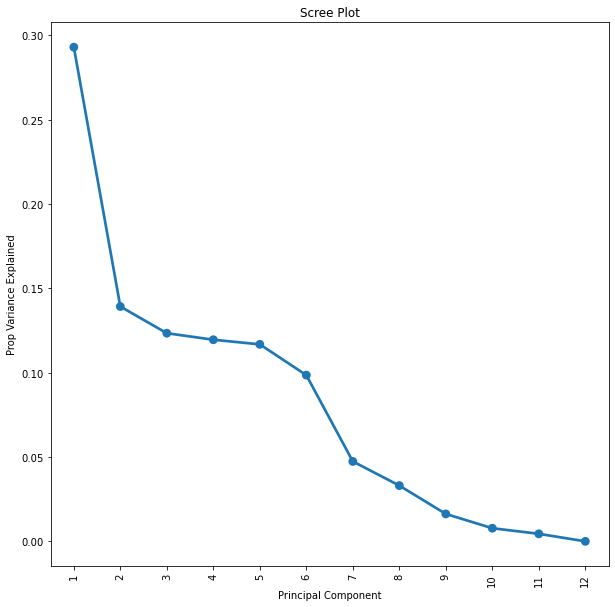

In [30]:
# Determining optimal number of components

scree_data = pd.DataFrame({'Principal Component':np.arange(1,standardized.shape[1]+1), 'Prop Variance Explained': pca.explained_variance_ratio_})

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.pointplot(x="Principal Component", y="Prop Variance Explained", data=scree_data).set_title('Scree Plot')

Text(0.5, 1.0, 'Scree Plot')

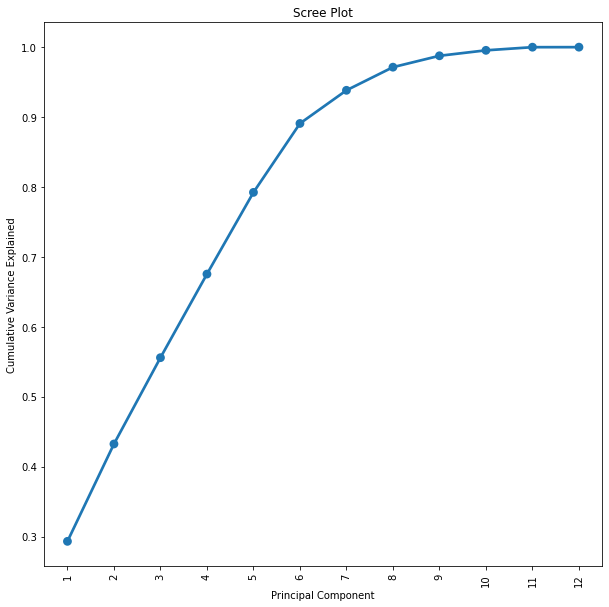

In [36]:
scree_data = pd.DataFrame({'Principal Component':np.arange(1,standardized.shape[1]+1), 'Cumulative Variance Explained': np.cumsum(pca.explained_variance_ratio_)})

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.pointplot(x="Principal Component", y="Cumulative Variance Explained", data=scree_data).set_title('Scree Plot')

In [31]:
# 89% of variance is in the first 6 PCs

pca.explained_variance_ratio_[:6].sum()

0.8908445534351588

In [32]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.046393,-0.006428,0.009761,-0.026418,0.595716,0.537133,0.046494,0.592719,0.005598,0.002078,-0.007807,0.007096
1,0.629558,0.102788,0.084910,0.699014,-0.003662,0.027278,-0.309461,-0.014715,-0.006788,-0.007617,0.014028,-0.014819
2,-0.289830,0.811870,0.295834,-0.063859,0.056351,-0.003531,-0.373189,0.002691,-0.063589,-0.030395,0.094669,-0.094205
3,-0.199710,-0.428938,0.863579,0.078269,-0.019440,0.041647,-0.135137,-0.008614,0.027321,0.011813,-0.039163,0.036945
4,0.221026,0.328196,0.348186,0.082680,0.010169,-0.121051,0.834109,0.019624,-0.026903,-0.015232,0.042266,-0.041765
5,0.654417,0.016050,0.194158,-0.702068,-0.029971,-0.030815,-0.196433,-0.011719,-0.007690,-0.003442,0.010861,-0.011158
6,0.016614,0.114151,0.011557,-0.025009,-0.355238,0.807525,0.096491,-0.388152,0.094853,0.038666,-0.134020,0.138623
7,0.002637,0.158373,0.018121,0.001598,-0.029532,-0.196325,-0.027550,0.191695,0.424249,0.154545,-0.579513,0.598291
8,0.014538,-0.010613,0.002059,-0.010261,0.716380,-0.052234,0.012100,-0.678453,0.081931,0.013391,-0.095061,0.085234
9,0.003107,0.006320,0.003400,0.002956,0.016814,-0.004780,-0.000070,-0.012218,-0.679682,0.635076,0.045603,0.363463


In [33]:
train_pcs = pc_scores.iloc[:,:6]
train_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.471082,0.270344,-0.486887,0.600463,-0.540924,-1.615606
1,0.624127,1.498240,-0.350465,-0.674034,0.329674,0.866783
2,0.528462,-0.477729,0.776858,0.343377,0.045975,-0.084287
3,0.635800,0.729681,-2.567904,0.609702,-0.724023,0.841407
4,0.562681,-0.769030,-1.075503,0.506759,-0.834757,-0.026859


In [34]:
# Adding back output variable

train_pcs["pickup_to_arrival_time"] = train["pickup_to_arrival_time"]
train_pcs

<ipython-input-34-d33336576636>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pcs["pickup_to_arrival_time"] = train["pickup_to_arrival_time"]


,PC1,PC2,PC3,PC4,PC5,PC6,pickup_to_arrival_time
0,0.471082,0.270344,-0.486887,0.600463,-0.540924,-1.615606,745
1,0.624127,1.498240,-0.350465,-0.674034,0.329674,0.866783,2886
2,0.528462,-0.477729,0.776858,0.343377,0.045975,-0.084287,2615
3,0.635800,0.729681,-2.567904,0.609702,-0.724023,0.841407,2986
4,0.562681,-0.769030,-1.075503,0.506759,-0.834757,-0.026859,1602
...,...,...,...,...,...,...,...
21191,4.931790,-1.062896,0.309299,0.716267,0.075468,-0.675893,919
21192,-1.171038,-0.495356,-0.627957,0.836395,-0.600034,-0.215312,2331
21193,-2.638964,5.581056,4.605506,2.905987,-12.821216,1.460329,2418
21194,-1.584970,-1.527358,0.818370,-0.671307,1.064702,-0.644520,717


In [35]:
train_pcs.to_pickle("clean-data/train-pca.pkl")